In [375]:
#Author: Oumeyma RHENNOU

# **Heart Attack Prediction**

##Description du Problème :
Les maladies cardiaques sont l'une des principales causes de décès dans le monde. Une prédiction précoce des crises cardiaques peut sauver des vies en permettant une intervention médicale rapide. Ce projet utilise des techniques d'apprentissage automatique pour prédire la probabilité d'une crise cardiaque à partir de divers indicateurs de santé des patients.

##Objectif :
L'objectif principal de ce projet est de construire un modèle prédictif capable d'analyser les données des patients et d'estimer le risque de crise cardiaque. Le modèle vise à aider les professionnels de santé à identifier les individus à haut risque et à prendre des décisions éclairées.

##Données :
Le jeu de données utilisé pour ce projet contient les dossiers de santé des patients avec des attributs tels que :

    Âge
    Sexe
    Taux de cholestérol
    Pression artérielle
    Fréquence cardiaque

Chaque enregistrement est étiqueté pour indiquer si le patient a subi une crise cardiaque (1) ou non (0).


##1. Importation des bibliothèques et chargement des données :

In [376]:
#Import necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
#Installer category_encoders
!pip install category_encoders
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install keras-tuner
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras import regularizers
from imblearn.over_sampling import SMOTE
from keras.callbacks import ReduceLROnPlateau, EarlyStopping






In [377]:
#Load the dataset 'heart_attack_prediction_dataset.csv' into a DataFrame named df_Heart
df_Heart = pd.read_csv('heart_attack_prediction_dataset.csv')
df_Heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,1
1,CZE1114,21,Male,389,165/93,98,1,1,0,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,1
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,1
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,1
4,GFO8847,66,Male,318,91/88,93,1,1,0,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,1


#Exploration de la DATA

In [378]:
#Displays summary information about the DataFrame,
df_Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [379]:
#Generates summary statistics for numeric columns and transposes the output for easier reading.
df_Heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.872760,0.333260,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [380]:
#Drop PatientID
df_Heart = df_Heart.drop("Patient ID", axis=1)

##2. Transformation de la pression artérielle :

La colonne **"Blood Pressure"** est mise à jour dans le DataFrame. Chaque valeur est transformée en un entier basé sur la formule :

$$
\text{Nouvelle valeur} = 2 \times \text{diastolique} + \frac{\text{systolique}}{3}
$$



In [381]:
#Converts 'Blood Pressure' values from string format "systolic/diastolic" to a numerical value based on a formula.
df_Heart['Blood Pressure'] = df_Heart['Blood Pressure'].apply(lambda x:int(2 * int(x.split("/")[1]) + int(x.split("/")[0]) / 3))
df_Heart['Blood Pressure'].head()

,Blood Pressure
0,228
1,241
2,256
3,254
4,206


##3. Histogrammes pour les colonnes numériques :

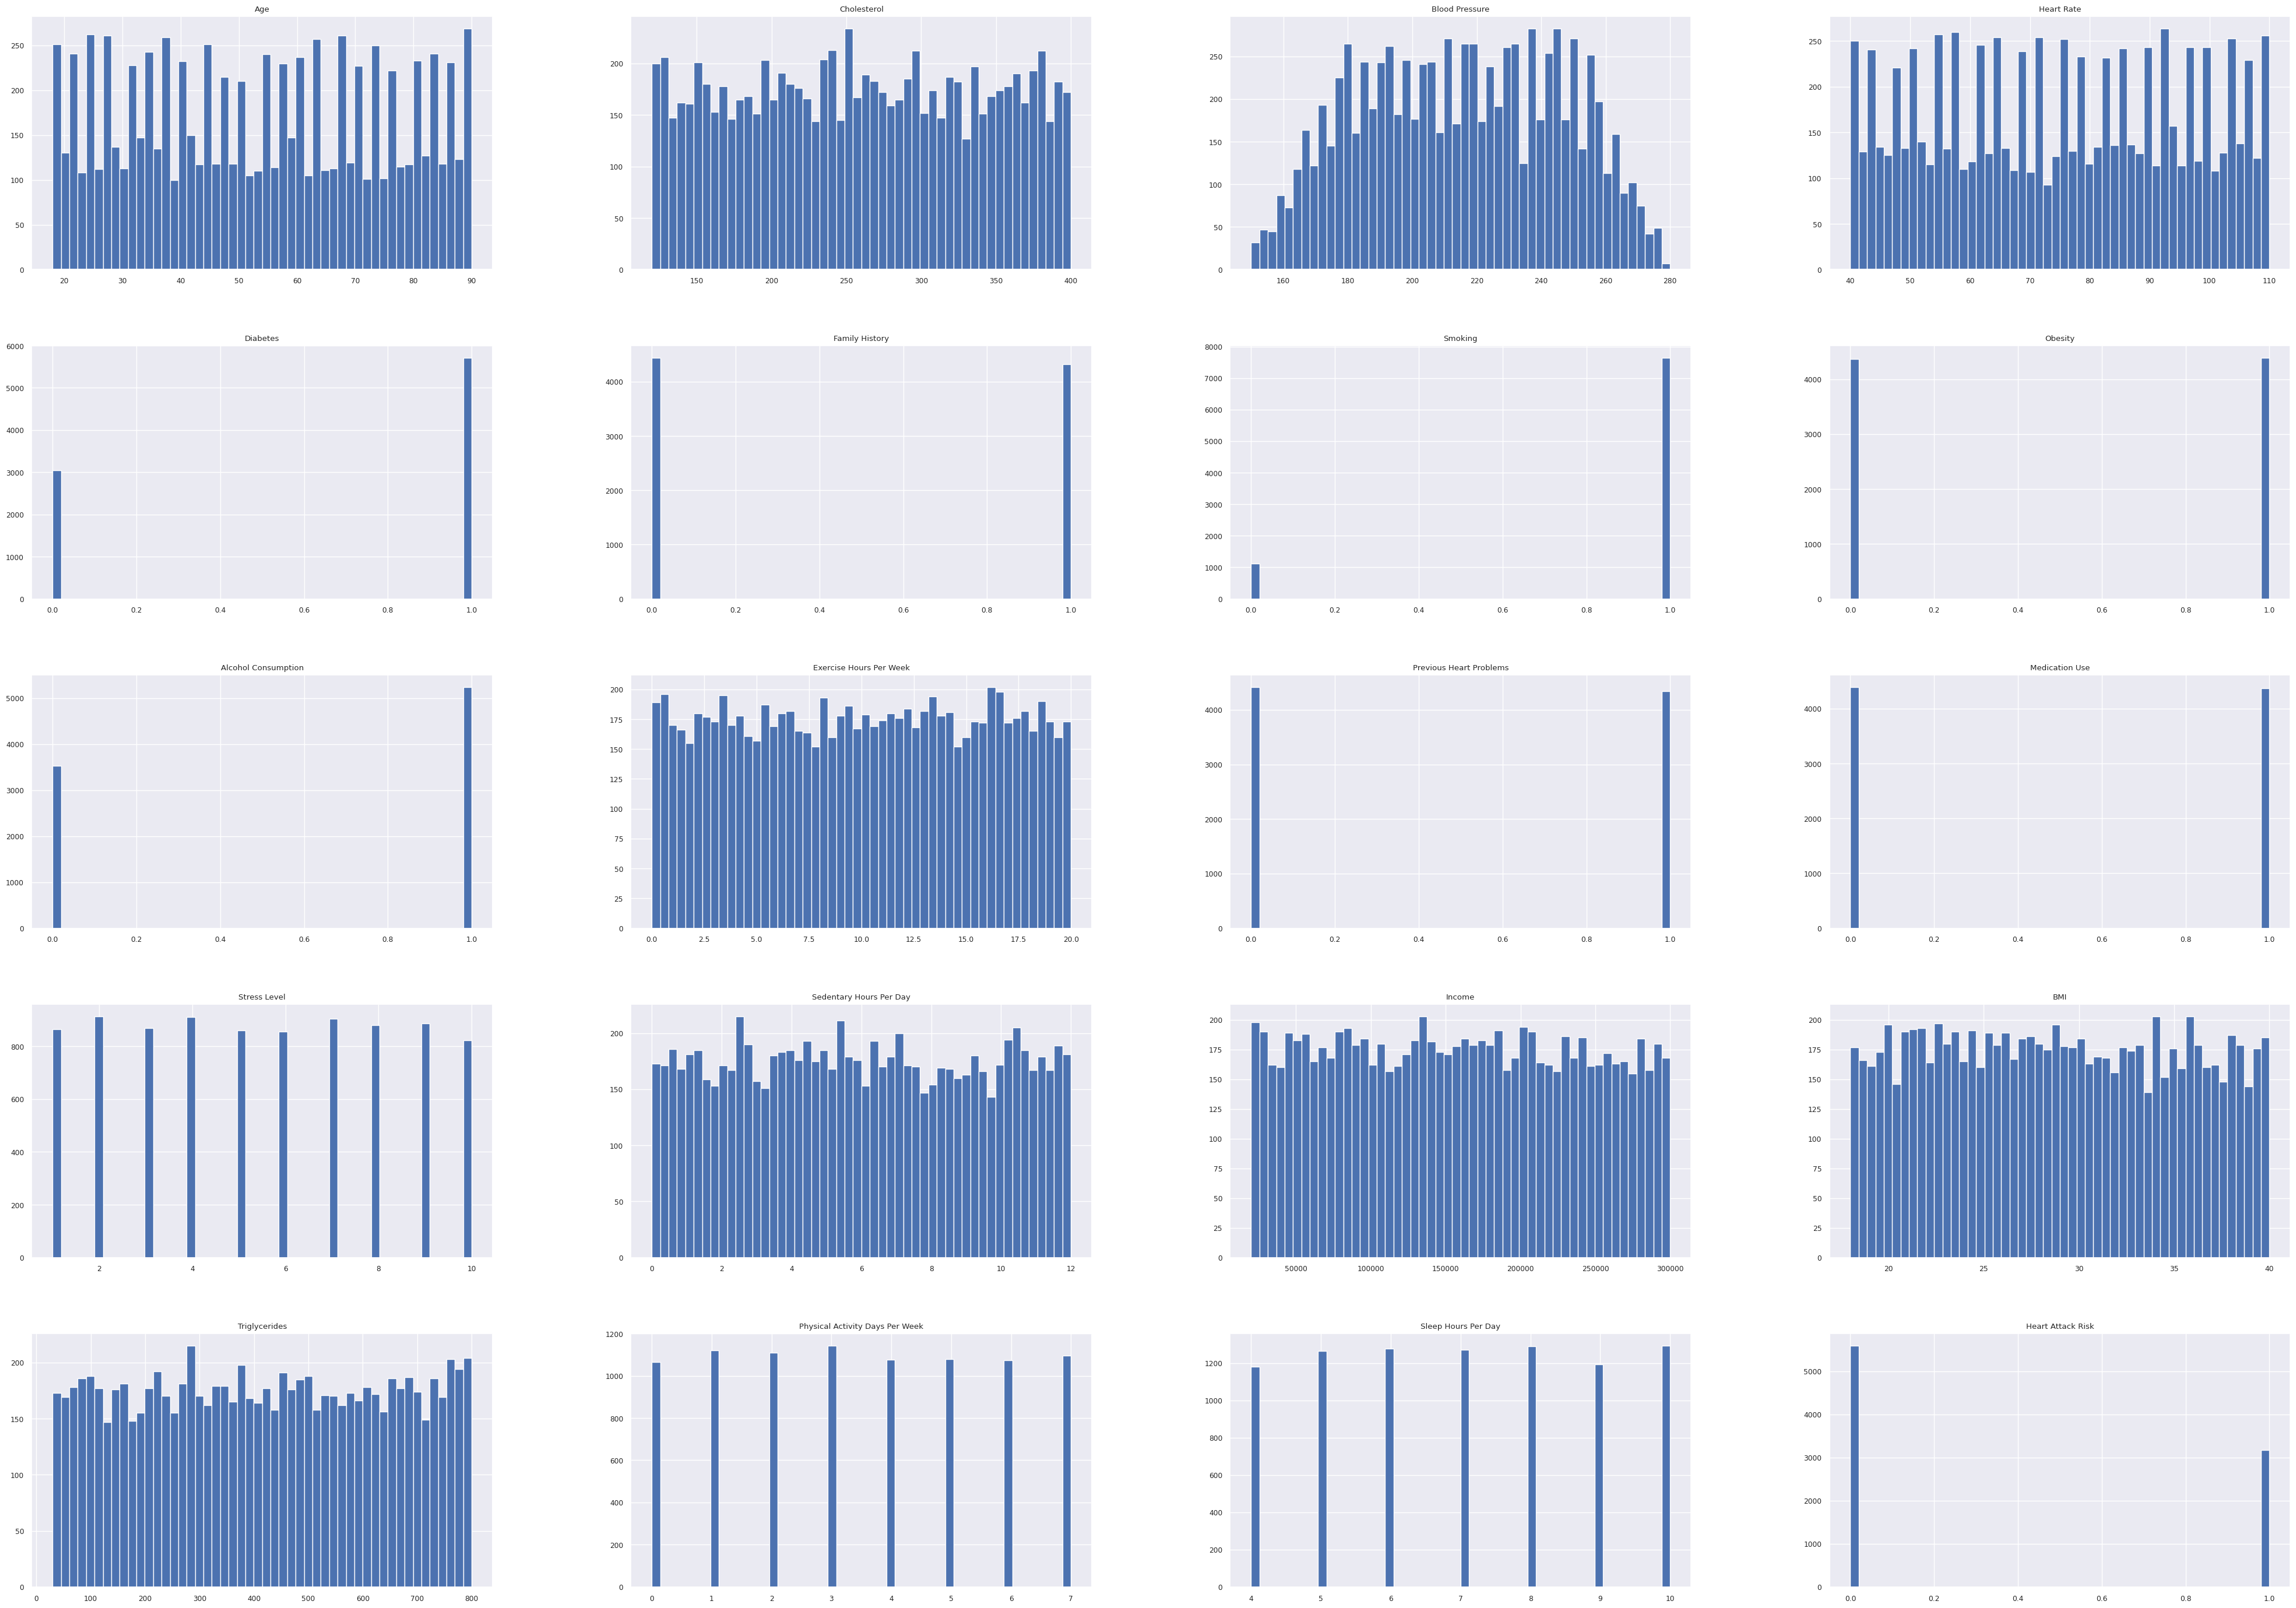

In [382]:
#Creates histograms for all numeric columns in the DataFrame with 50 bins and a large figure size for better visualization.
df_Heart.hist(bins=50, figsize=(50,35))
plt.show()


In [383]:
# Converts all columns with object data types to the 'string' data type for consistency.
string_col = df_Heart.select_dtypes(include="object").columns
df_Heart[string_col]=df_Heart[string_col].astype("string")

##4. Graphiques à barres et à secteurs pour les données catégorielles :

In [384]:
#Defines a list of categorical feature columns in the dataset for further analysis or encoding.
categorical_features = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Physical Activity Days Per Week',
        'Sleep Hours Per Day', 'Continent', 'Hemisphere', 'Country']


In [385]:
# #Plots bar charts and pie charts for each categorical feature to visualize the distribution of values.
# plt.figure(figsize=(12,65))

# i = 0
# j = 0

# for col in categorical_features:
#     feature = df_Heart.groupby(col)[col].count() #Counts occurrences of each category in the column
#     plt.subplot(15, 2, i+1) #Creates a subplot for the bar chart
#     plt.bar(x=feature.index, height=feature.values)
#     plt.title(col, fontsize=15)
#     plt.xlabel("")

#     if col == "Country":
#         plt.xticks(rotation=90) #Rotates x-ticks for better readability if the column is "Country"
#     if col == "Continent":
#         plt.xticks(rotation=10) #Slightly rotates x-ticks for "Continent"

#     plt.subplot(15, 2, j+2) #Creates a subplot for the pie chart
#     plt.pie(x=feature.values, autopct="%.1f%%", pctdistance=0.8, labels=feature.index)
#     plt.title(col, fontsize=15)
#     i += 2
#     j += 2

# plt.tight_layout()
# plt.show()


In [386]:
#Displays the data types of all columns in the DataFrame `df_Heart`.
df_Heart.dtypes

,0
Age,int64
Sex,string[python]
Cholesterol,int64
Blood Pressure,int64
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64


##5. Séparation des colonnes :

In [387]:
#Separates the columns into two lists: one for string columns and one for numeric columns.
string_col = df_Heart.select_dtypes("string").columns.to_list()
num_col = df_Heart.columns.to_list()
for col in string_col:
    num_col.remove(col) #Removes string columns from the list of all columns, leaving only numeric columns



In [388]:
#Generates summary statistics for numeric columns and transposes the output for easier reading.
df_Heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Blood Pressure,8763.0,215.010270,30.749871,150.000000,189.000000,215.000000,241.000000,280.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.872760,0.333260,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709


In [389]:
#Creates a new DataFrame `df_only_numbers` containing only the numeric columns from `df_Heart`.
df_only_numbers = df_Heart[num_col]
#df_only_numbers.columns

##6. Préparation des données :

In [390]:
#Prepares the data by encoding categorical variables, creating dummy variables, and selecting relevant columns for analysis.

#data = df_Heart.copy() #Creates a copy of the original DataFrame to avoid modifying the original data.

#Label encoding for categorical columns 'Sex' and 'Hemisphere'
le = LabelEncoder()
target_encoder = TargetEncoder()
df_Heart[["Sex", "Hemisphere"]] = df_Heart[["Sex", "Hemisphere"]].agg(le.fit_transform)

#Target encoding for 'Continent' and 'Country' based on 'Heart Attack Risk' as the target variable
df_Heart["Continent"] = target_encoder.fit_transform(df_Heart["Continent"], df_Heart["Heart Attack Risk"])
df_Heart["Country"] = target_encoder.fit_transform(df_Heart["Country"], df_Heart["Heart Attack Risk"])

#Creates dummy variables for the 'Diet' column
df_Heart = pd.get_dummies(data=df_Heart, columns=["Diet"])


df_Heart.head()
#df_Heart['Income'].hist()
#df_Heart['Cholesterol'].hist()
df_Heart['Income']

,Income
0,261404
1,285768
2,235282
3,125640
4,160555
...,...
8758,235420
8759,217881
8760,36998
8761,209943


##7. Analyse de la corrélation :

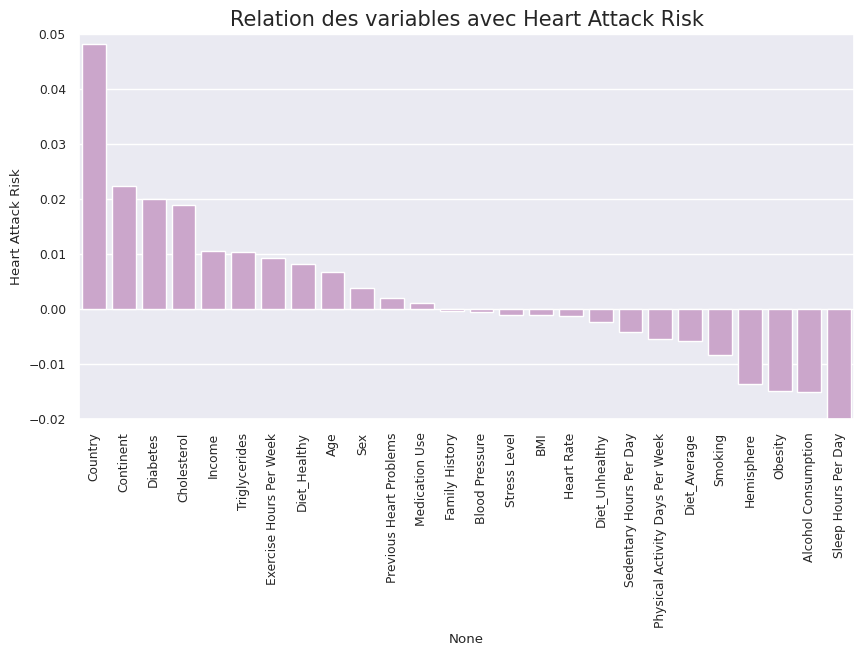

In [391]:
#Calculates and visualizes the correlation of variables with 'Heart Attack Risk' using a bar plot.
heart_attack_corr = df_Heart.corr()['Heart Attack Risk'] #Calculates the correlation of all features with 'Heart Attack Risk'
heart_attack_corr = heart_attack_corr.drop("Heart Attack Risk", axis=0).sort_values(ascending=False) #Drops 'Heart Attack Risk' and sorts correlations in descending orde

#Creates a bar plot to visualize the correlation with 'Heart Attack Risk'
plt.figure(figsize=(10,5))
sns.set(font_scale=0.8)
sns.barplot(x=heart_attack_corr.index, y=heart_attack_corr, color="#D1A0D1")

# Customizing the plot
plt.xticks(rotation=90)
plt.ylim(-0.02, 0.05)
plt.title("Relation des variables avec Heart Attack Risk", fontsize=15)
plt.show()

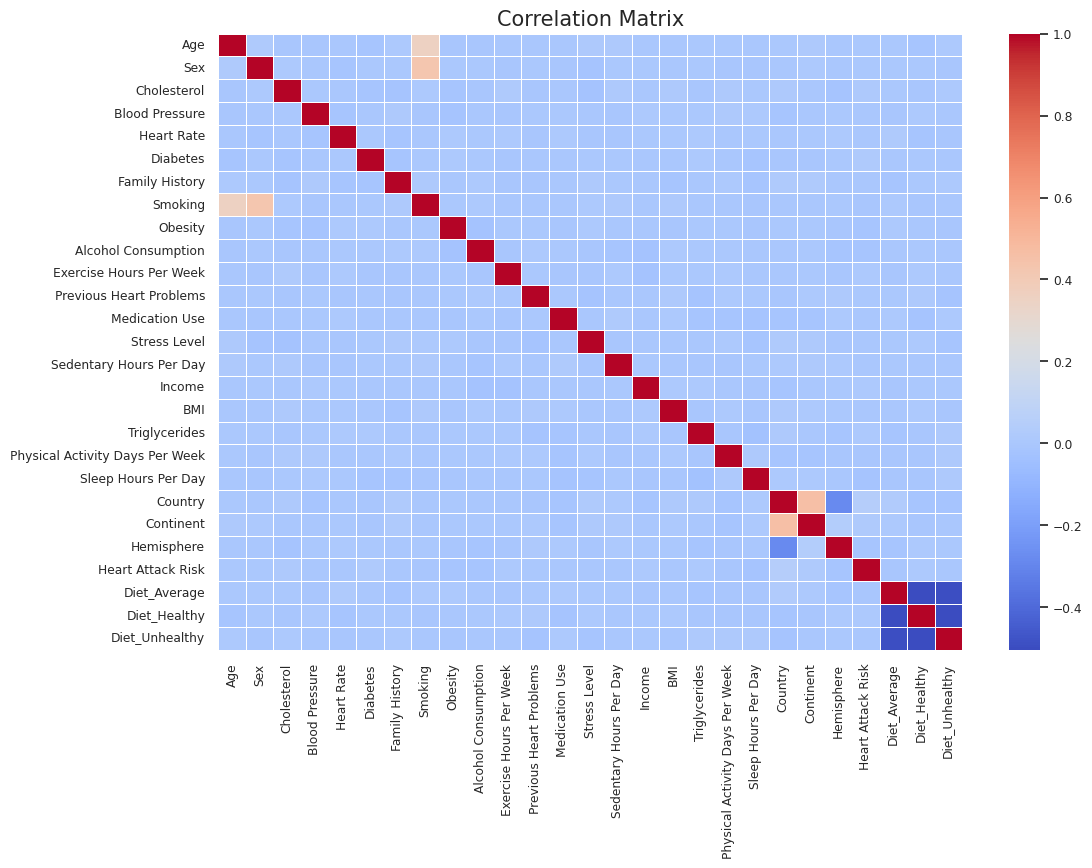

In [392]:
#Computes and visualizes the correlation matrix of all variables in the data using a heatmap.
correlation_matrix = df_Heart.corr()

#Creates a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix", fontsize=15)
plt.show()


##8. Analyse du tabagisme par sexe :

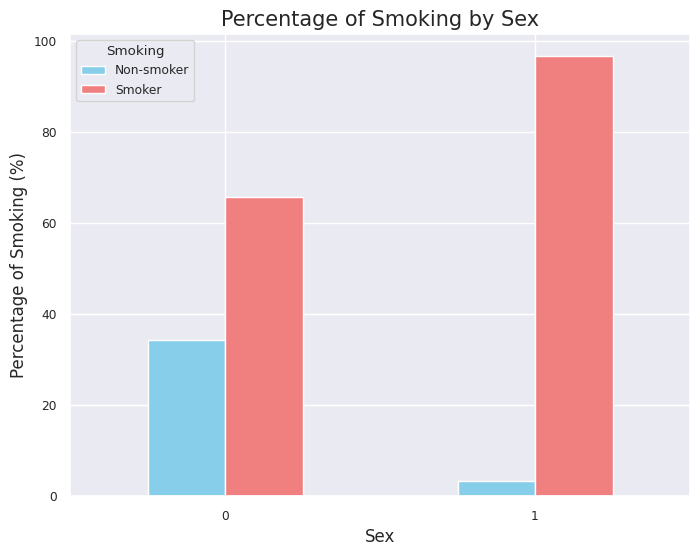

In [393]:
#Calculates and visualizes the percentage of smokers by sex using a stacked bar chart.
smoking_percentage = df_Heart.groupby('Sex')['Smoking'].value_counts(normalize=True).unstack().fillna(0) * 100

#Creates a stacked bar chart to visualize the smoking percentages by sex
smoking_percentage.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightcoral'])

plt.title("Percentage of Smoking by Sex", fontsize=15)
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Percentage of Smoking (%)", fontsize=12)


plt.xticks(rotation=0)
plt.legend(title="Smoking", labels=["Non-smoker", "Smoker"])
plt.show()

In [394]:
# #Create histograms and kernel density plots for each numeric column in the DataFrame
# checked = df_Heart[num_col]

# #Create a grid of subplots with 4 rows and 4 columns
# fig, axes = plt.subplots(4, 4, figsize=(10, 7))

# #Iterate over the columns of the 'checked' DataFrame
# for i, colu in enumerate(checked.columns):
#     row = i // 5
#     col = i % 4
#     ax = axes[row, col]
#     ax.hist(checked[colu], bins=10, density=True, color='skyblue', alpha=0.5)
#     checked[colu].plot.kde(ax=ax, color='red')
#     ax.set_title('Distribution of {}'.format(colu))

# plt.tight_layout()
# plt.show()


##9. Gestion des valeurs manquantes :

In [395]:
#Check for missing & dublicate values
print(f"La somme des valeurs null : {df_Heart.isnull().sum().sum()}")
print(f"La somme des valeurs duppliquees : {df_Heart.duplicated().sum()}")


La somme des valeurs null : 0
La somme des valeurs duppliquees : 0


##10. Exploration des valeurs aberrantes :

In [396]:
Q1 = df_Heart['Cholesterol'].quantile(0.25)
Q3 = df_Heart['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_Heart[(df_Heart['Cholesterol'] < lower_bound) | (df_Heart['Cholesterol'] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk, Diet_Average, Diet_Healthy, Diet_Unhealthy]
Index: []

[0 rows x 27 columns]


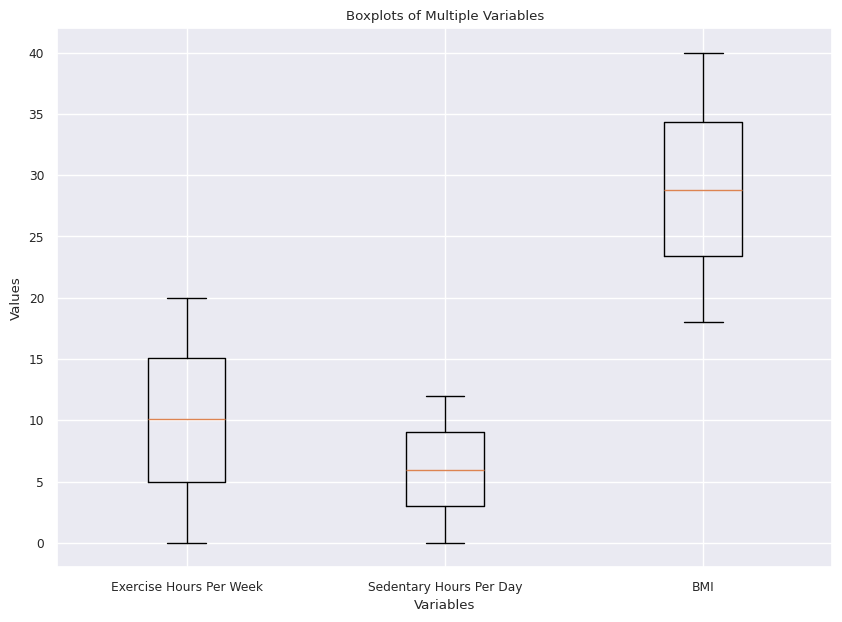

In [397]:
#Converts specified columns to numeric values and creates boxplots for 'Exercise Hours Per Week', 'Sedentary Hours Per Day', and 'BMI'.
columns_specify1 = ['Exercise Hours Per Week', 'Sedentary Hours Per Day', 'BMI']
df_Heart[columns_specify1] = df_Heart[columns_specify1].apply(pd.to_numeric, errors='coerce')

#Creates a boxplot to visualize the distribution of the specified columns
plt.figure(figsize=(10, 7))
plt.boxplot(df_Heart[columns_specify1].values, labels=columns_specify1)
plt.title('Boxplots of Multiple Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

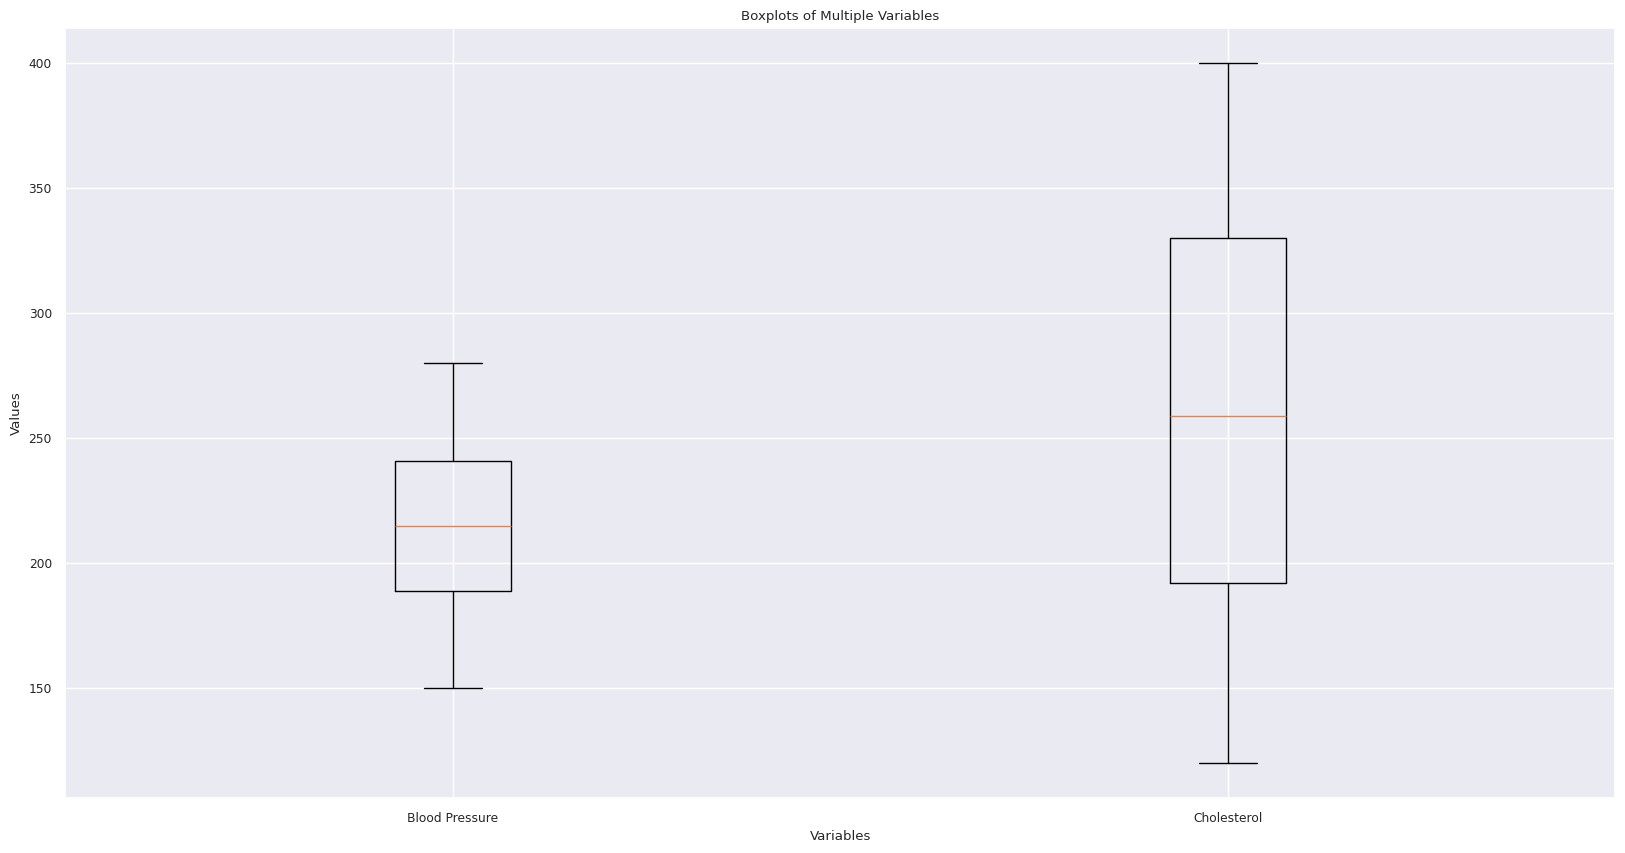

In [398]:
#Converts specified columns to numeric values and creates boxplots for 'Blood Pressure' and 'Cholesterol'.
columns_specify = ['Blood Pressure', 'Cholesterol']
df_Heart[columns_specify] = df_Heart[columns_specify].apply(pd.to_numeric, errors='coerce')

#Creates a boxplot to visualize the distribution of the specified columns
plt.figure(figsize=(20, 10))
plt.boxplot(df_Heart[columns_specify].values, labels=columns_specify)
plt.title('Boxplots of Multiple Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


####Interqurtile Range (IQR)
La méthode IQR est couramment utilisée pour identifier les valeurs aberrantes.


In [399]:
#Define a function to detect outliers in a specified column
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


#Iterate over a list of columns to check for outliers
for col in ['Age', 'Cholesterol', 'Blood Pressure', 'BMI']:
    outliers = detect_outliers_iqr(df_Heart, col)
    #print(f"Outliers in {col}:\n", outliers)
df_Heart['Sex'].head()


,Sex
0,1
1,1
2,0
3,1
4,1


In [400]:
#Convert the column names of the DataFrame `df_Heart` into a NumPy array
columns = df_Heart.columns.to_numpy()

#Define the target variable as a string, representing the column to be predicted
target  = "Heart Attack Risk"
df_Heart.iloc[:5, 10:20]

,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6
1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7
2,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4
3,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4
4,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5


In [401]:
#Separate the feature variables from the target variable
x = df_Heart.drop(target, axis = 1)

#`y` contains only the target variable, which we aim to predict
y = df_Heart[target]

#Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [402]:
#Initialize three different scalers for feature scaling:
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()
#Choose one scaler to apply for scaling
scaler = minmax

#Fit the selected scaler to the training data
scaler.fit(x_train)

#Transform the training data using the fitted scaler
x_train_scaled = scaler.transform(x_train)

#Transform the testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

In [403]:
#Model-Based Feature Selection
#Initialize a Random Forest Classifier:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#Fit the Random Forest model on the training data:
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [404]:
#Extract the feature importance values from the trained Random Forest model.
feature_importance = rf.feature_importances_


#Create a DataFrame to organize and store the feature importance scores:
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importance
})

#Sort the DataFrame by the 'Importance' column in descending order:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Filter the DataFrame to select only the top features:
top_features = feature_importance_df[feature_importance_df['Importance'] > 0.0098]
top_features


,Feature,Importance
16,BMI,0.080467
10,Exercise Hours Per Week,0.080412
14,Sedentary Hours Per Day,0.080372
15,Income,0.079777
17,Triglycerides,0.078041
2,Cholesterol,0.076330
3,Blood Pressure,0.071948
0,Age,0.069592
4,Heart Rate,0.068977
20,Country,0.047180


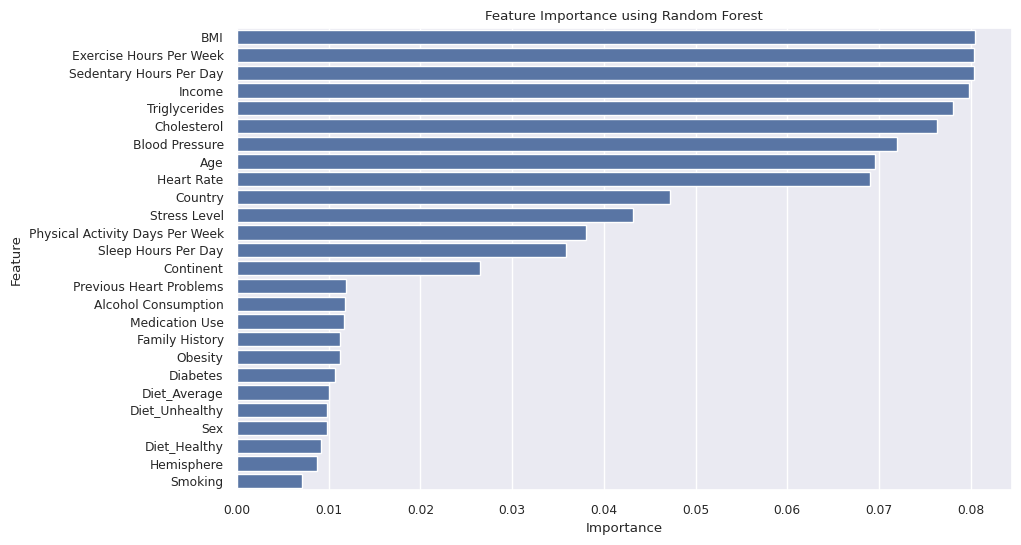

In [405]:
#Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance using Random Forest')
plt.show()

In [406]:
df = df_Heart.loc[:, top_features.Feature]
df

,BMI,Exercise Hours Per Week,Sedentary Hours Per Day,Income,Triglycerides,Cholesterol,Blood Pressure,Age,Heart Rate,Country,...,Continent,Previous Heart Problems,Alcohol Consumption,Medication Use,Family History,Obesity,Diabetes,Diet_Average,Diet_Unhealthy,Sex
0,31.251233,4.168189,6.615001,261404,286,208,228,67,72,0.373673,...,0.368576,0,0,0,0,0,0,True,False,1
1,27.194973,1.813242,4.963459,285768,235,389,241,21,98,0.372727,...,0.383721,1,1,0,1,1,1,False,True,1
2,28.176571,2.078353,9.463426,235282,587,324,256,21,72,0.354260,...,0.348505,1,0,1,0,0,1,False,False,0
3,36.464704,9.828130,7.648981,125640,378,383,254,84,73,0.372727,...,0.383721,1,1,0,1,0,1,True,False,1
4,21.809144,5.804299,1.514821,160555,231,318,206,66,93,0.380841,...,0.357845,1,0,0,1,1,1,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,19.655895,7.917342,10.806373,235420,67,121,183,60,61,0.380841,...,0.357845,1,1,1,1,0,1,False,False,1
8759,23.993866,16.558426,3.833038,217881,617,120,256,28,73,0.372727,...,0.383721,0,0,0,0,1,1,False,False,0
8760,35.406146,3.148438,2.375214,36998,527,250,203,47,105,0.352814,...,0.368576,1,1,0,1,1,0,True,False,1
8761,27.294020,3.789950,0.029104,209943,114,178,173,36,60,0.352814,...,0.368576,1,0,1,0,0,1,False,True,1


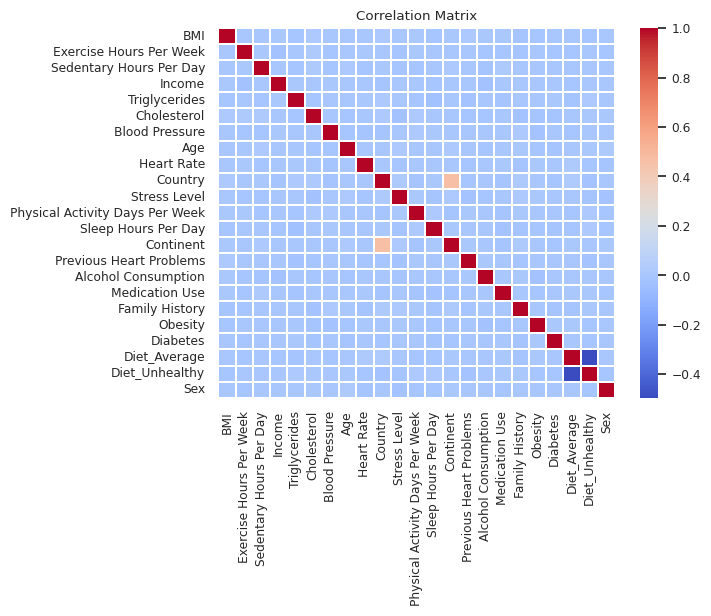

In [407]:
#Compute correlation matrix for all variables
corr_matrix = df.corr()

#Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

In [408]:
#df[target] = y
#df.to_csv('../data/processed/randomForest_selected_features.csv', sep = ',', header = True, index = False)

In [409]:
#Iterative Feature Selection

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=15)
select.fit(x_train, y_train)
#visualize the selected features:
mask = select.get_support()
features_rfe = select.get_feature_names_out()
print(features_rfe)


['Age' 'Cholesterol' 'Blood Pressure' 'Heart Rate' 'Family History'
 'Exercise Hours Per Week' 'Stress Level' 'Sedentary Hours Per Day'
 'Income' 'BMI' 'Triglycerides' 'Physical Activity Days Per Week'
 'Sleep Hours Per Day' 'Country' 'Continent']


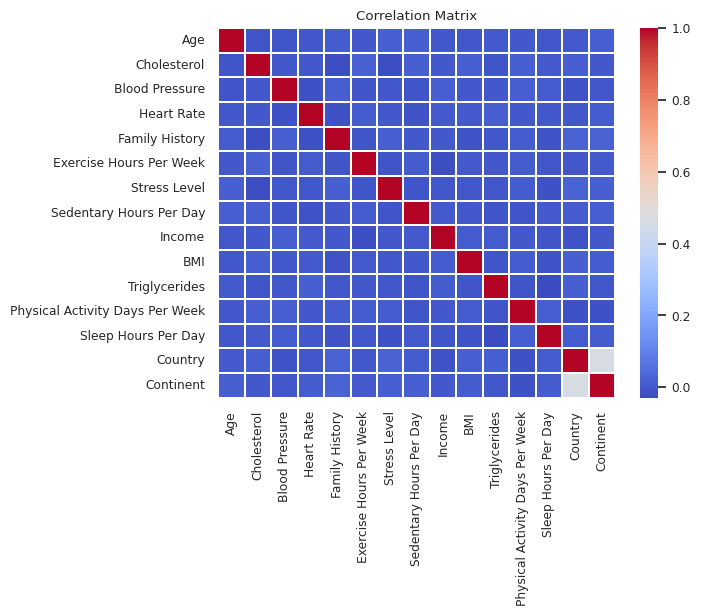

In [410]:
#Extract the subset of the original DataFrame based on selected features:
df_rfe= df_Heart.loc[:, features_rfe]
df_rfe
corr_matrix_rfe = df_rfe.corr()
#Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix_rfe, annot=False, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

##11. Filtrage de la DATA

In [411]:
#Set a correlation threshold value to identify highly correlated features.
threshold = 0.4

#Calculate the absolute correlation matrix for the DataFrame `df`:
cor_matrix = df.corr().abs()

#Generate an upper triangular matrix from the correlation matrix:
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
# Identify columns with high correlation:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df_reduced = df.drop(columns=to_drop)

print("Colonnes supprimées : ", to_drop)


Colonnes supprimées :  ['Continent', 'Diet_Unhealthy']


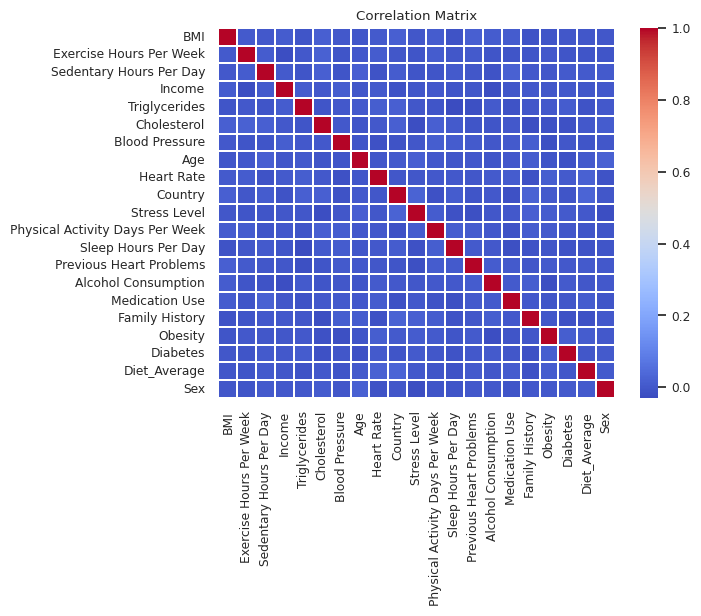

In [412]:
corr_matrix_rfe = df_reduced.corr()
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix_rfe, annot=False, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

##12. Partie Graphique :
Affichage des metrics.

In [413]:
def show_metrics(y_test, prediction):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    #Calculate performance metrics
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, zero_division=1)
    recall = recall_score(y_test, prediction, zero_division=1)
    f1 = f1_score(y_test, prediction, zero_division=1)
    #Store metrics in a dictionary
    metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
    }
    #Visualization of the metrics                            ,
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()),
                hue = list(metrics.keys()),
                palette="viridis", legend=True)
    plt.ylim(0, 1)
    plt.title("Performance Metrics")
    plt.ylabel("Scores")
    plt.xlabel("Metrics")
    plt.show()

    return metrics



In [414]:
def show_crossvalidation_box(model, x_train_scaled, y_train):
    from sklearn.model_selection import cross_val_score, KFold
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    #Set up K-Fold cross-validation
    kfold = KFold(n_splits = 7, shuffle=True, random_state = 42)

    #Perform cross-validation
    scores = cross_val_score(model, x_train_scaled, y_train, cv = kfold)

    #Visualization of Cross-Validation Scores Distribution
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=scores, color="orange", width=0.4)
    sns.stripplot(data=scores, color="black", alpha=0.7, size=8, jitter=True)
    plt.axhline(y=np.mean(scores), color="red", linestyle="--", label=f"Mean: {np.mean(scores):.3f}")
    plt.title("Cross-Validation Scores Distribution")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

    return scores

In [415]:
def display_scores(scores, name):
    print("--------------------", name, "--------------------")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [416]:
def show_confusion_matrix(y_test, prediction):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    #Calculate the confusion matrix using the true labels (y_test) and predicted labels (prediction)
    confusion = confusion_matrix(y_test, prediction)

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='plasma')
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


Training Logistic Regression...

Logistic Regression Metrics:


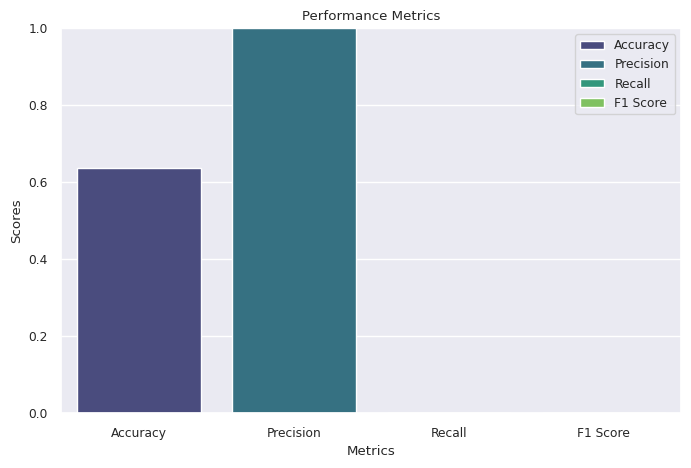


Logistic Regression Confusion Matrix:


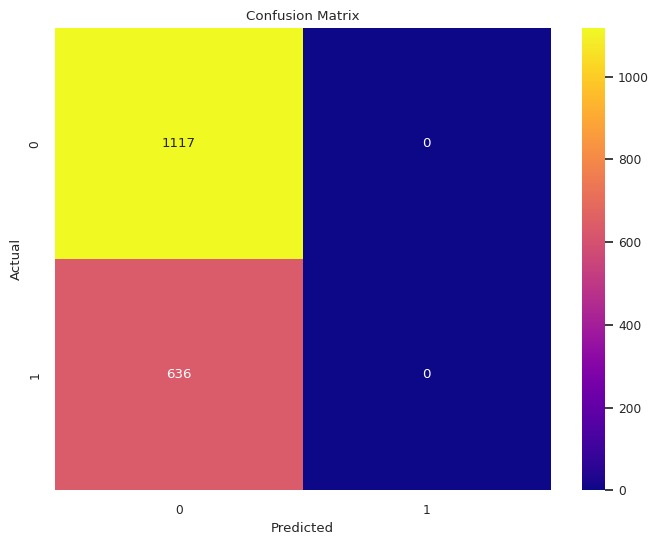


Logistic Regression Cross-Validation Scores:


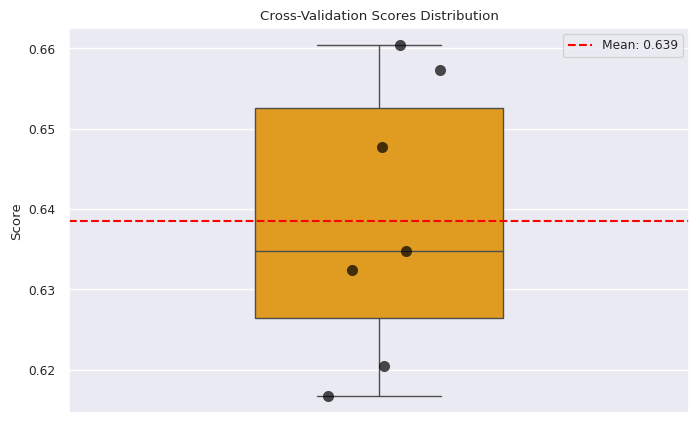


Training Decision Tree...

Decision Tree Metrics:


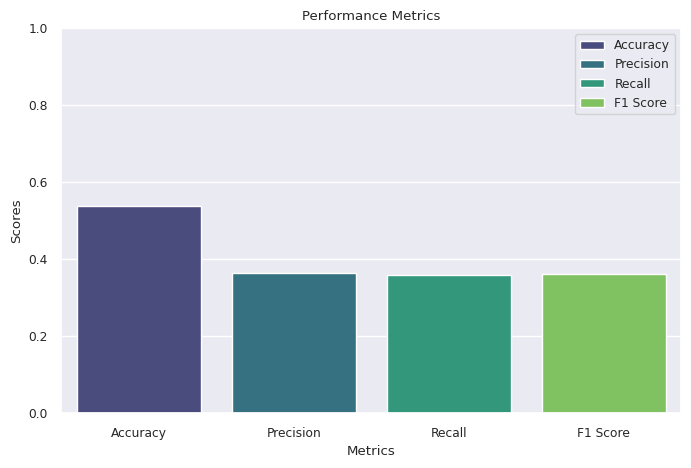


Decision Tree Confusion Matrix:


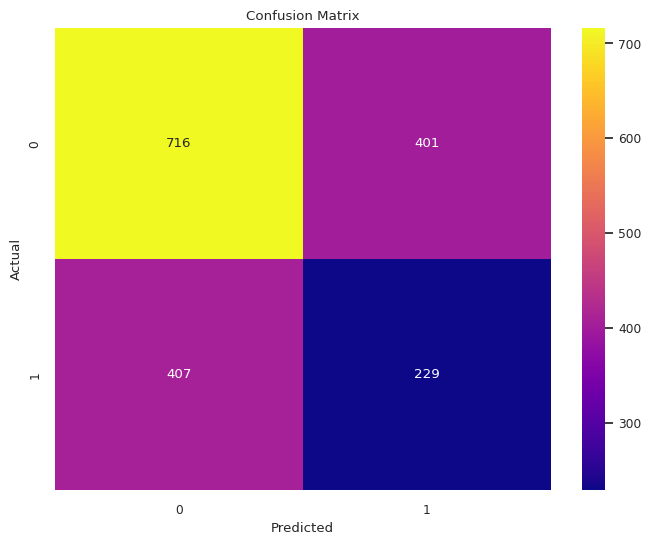


Decision Tree Cross-Validation Scores:


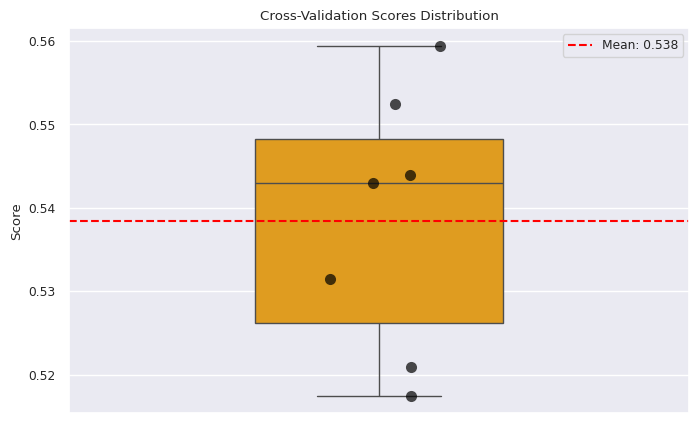


Training Random Forest...

Random Forest Metrics:


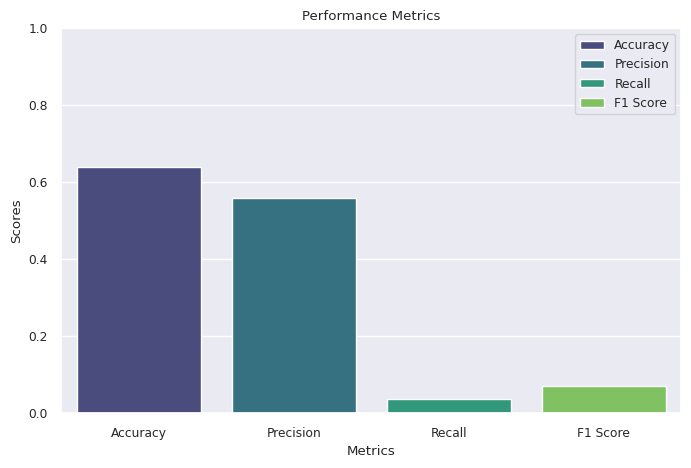


Random Forest Confusion Matrix:


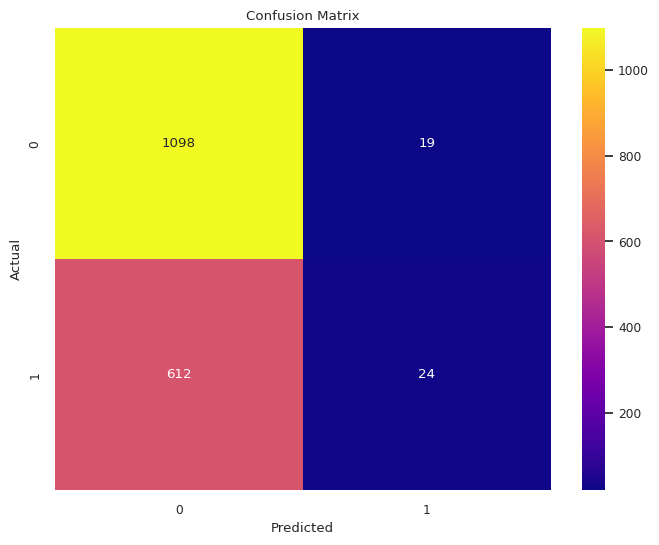


Random Forest Cross-Validation Scores:


KeyboardInterrupt: 

In [424]:

#Define a dictionary containing various models to be trained and evaluated
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier(max_iter=1000)
}


#Loop through each model to train, evaluate, and display the results
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Entraînement
    model.fit(x_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(x_test_scaled)

    # Affichage des métriques
    print(f"\n{name} Metrics:")
    metrics = show_metrics(y_test, y_pred)

    # Affichage de la matrice de confusion
    print(f"\n{name} Confusion Matrix:")
    show_confusion_matrix(y_test, y_pred)

    # Affichage des scores de validation croisée
    print(f"\n{name} Cross-Validation Scores:")
    cv_scores = show_crossvalidation_box(model, x_train_scaled, y_train)


##13. Modèle de réseau de neurones

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5201 - loss: 1.1204 - val_accuracy: 0.5009 - val_loss: 24.7855 - learning_rate: 1.0000e-04
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4985 - loss: 1.0670 - val_accuracy: 0.6110 - val_loss: 35.7098 - learning_rate: 1.0000e-04
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5162 - loss: 1.0128 - val_accuracy: 0.5180 - val_loss: 18.8520 - learning_rate: 1.0000e-04
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4944 - loss: 0.9759 - val_accuracy: 0.6110 - val_loss: 33.6745 - learning_rate: 1.0000e-04
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4999 - loss: 0.9386 - val_accuracy: 0.5973 - val_loss: 40.6003 - learning_rate: 1.0000e-04
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5211 - loss: 0.9015 - val_accuracy: 0.5722 - val_loss: 28.3901 - learning_rate: 1.0000e-04
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

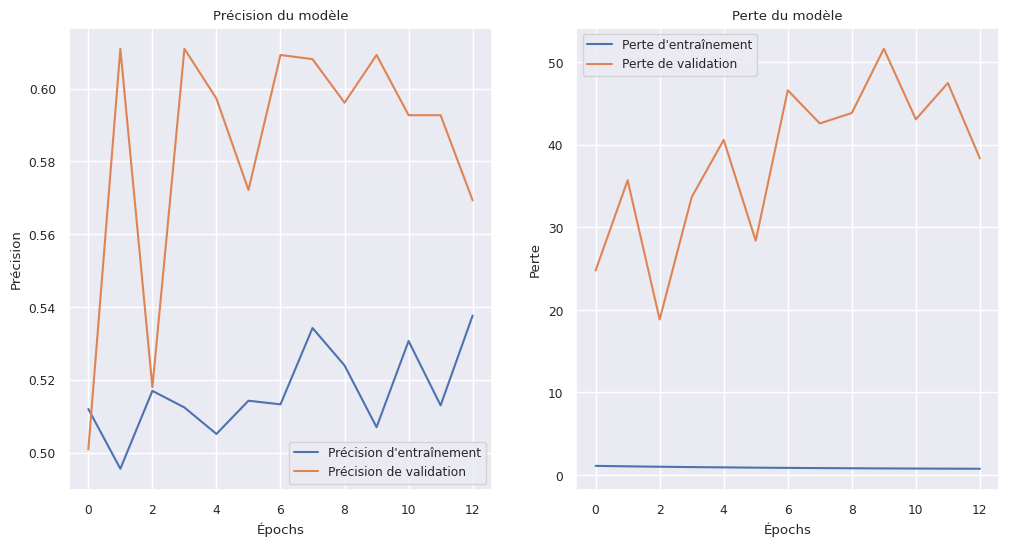

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report :
              precision    recall  f1-score   support

           0       0.64      0.56      0.60      1117
           1       0.36      0.44      0.40       636

    accuracy                           0.52      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.52      0.53      1753

[[630 487]
 [358 278]]


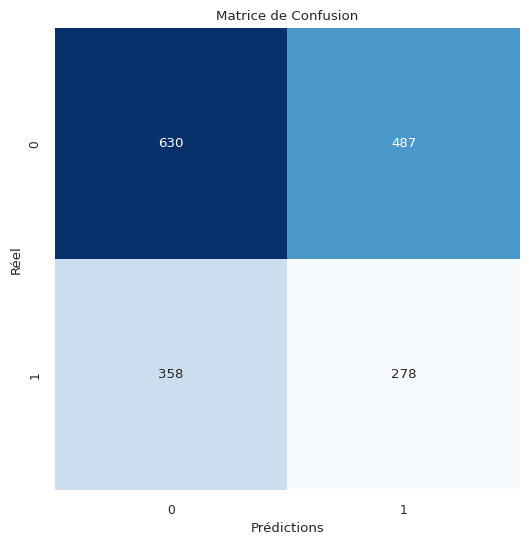

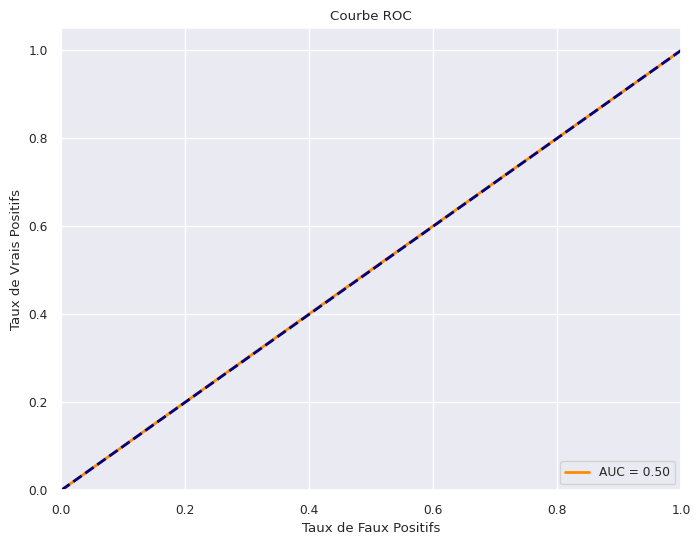

In [423]:

#Data Preparation: Converting DataFrames to NumPy Arrays if needed ---
x_train = np.array(x_train) if isinstance(x_train, pd.DataFrame) else x_train
y_train = np.array(y_train) if isinstance(y_train, pd.DataFrame) else y_train

#Same for X_val and y_val
X_val = np.array(X_val) if isinstance(X_val, pd.DataFrame) else X_val
y_val = np.array(y_val) if isinstance(y_val, pd.DataFrame) else y_val

#Normalize training and validation data
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

#Convert y_train to 1D array (if needed)
y_train = np.ravel(y_train)

#Convert y_val to 1D array (if needed)
y_val = np.ravel(y_val)



In [ ]:

#Apply SMOTE for over-sampling to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [ ]:
#Compute class weights to handle imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))



##14. Configuration des couches du réseau

In [ ]:
#Create the neural network model with an explicit Input layer
model_nr = Sequential()
model_nr.add(Input(shape=(x_train_res.shape[1],)))
model_nr.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 régularisation
model_nr.add(Dropout(0.5))  # Dropout pour éviter l'overfitting
model_nr.add(Dense(128, activation='relu'))  # Augmenter la taille de la couche
model_nr.add(Dense(64, activation='relu'))
model_nr.add(Dense(1, activation='sigmoid'))  # Sortie binaire

#Compile the model with Adam optimizer and binary cross-entropy loss
model_nr.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


##15. Entraînement du modèle :

In [ ]:
#Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

#Train the model
history = model_nr.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                       class_weight=class_weights_dict, callbacks=[early_stopping, reduce_lr])

In [ ]:

#Evaluate the model on validation data
test_loss, test_accuracy = model_nr.evaluate(X_val, y_val)
print(f"Perte sur le jeu de validation: {test_loss}")
print(f"Précision sur le jeu de validation: {test_accuracy}")

##16. courbes de perte et de précision

In [ ]:
#Plot the training accuracy vs validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Précision du modèle')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()


In [ ]:
#Plot the training loss vs validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte du modèle')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()
plt.show()


In [ ]:
#Make predictions on the validation set
y_pred = model_nr.predict(X_val)
y_pred = (y_pred > 0.5)

#Display classification report
print("Classification Report :")
print(classification_report(y_val, y_pred))

##17. Matrice de confusion

In [ ]:
#Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)

#Display confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()


##18. Courbe ROC

In [ ]:
#Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()